In [4]:
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import itertools

import keras
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.models import Sequential
import itertools
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
# x_train = np.reshape(x_train,(50000,3072))
# print(x_train.shape)
# x_test = np.reshape(x_test,(10000,3072))

#standardizing
x_train_mean = np.mean(x_train)
x_train_std  = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean) / x_train_std
x_test  = (x_test - x_test_mean) / x_test_std 

print(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1201)

[0 1 2 3 4 5 6 7 8 9]


In [10]:
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
from keras.layers.normalization import BatchNormalization
from keras.applications.vgg16 import VGG16

model1 = models.Sequential()

model1.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(BatchNormalization())

model1.add(layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(BatchNormalization())

model1.add(Dropout(0.50))
model1.add(layers.Flatten())

model1.add(layers.Dense(512, activation = 'relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.50))

model1.add(layers.Dense(10,activation = 'softmax'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       36992     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 8, 128)        

In [0]:
model1.compile(loss='categorical_crossentropy',
               optimizer= RMSprop(),
               metrics=['accuracy'])

In [12]:
model1.compile(loss='categorical_crossentropy',
               optimizer= RMSprop(),
               metrics=['accuracy'])
history1 = model1.fit(x_train, y_train,
           epochs=40,
           batch_size = 100,
           validation_data = (x_validate, y_validate),
           verbose = 1) 

Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 [==============================] - 6s 146us/step - loss: 1.5606 - accuracy: 0.5052 - val_loss: 1.2585 - val_accuracy: 0.5500
Epoch 2/40
40000/40000 [==============================] - 5s 131us/step - loss: 1.0217 - accuracy: 0.6432 - val_loss: 0.8746 - val_accuracy: 0.6997
Epoch 3/40
40000/40000 [==============================] - 5s 132us/step - loss: 0.8703 - accuracy: 0.6937 - val_loss: 0.8344 - val_accuracy: 0.7127
Epoch 4/40
40000/40000 [==============================] - 5s 132us/step - loss: 0.7715 - accuracy: 0.7308 - val_loss: 0.8018 - val_accuracy: 0.7264
Epoch 5/40
40000/40000 [==============================] - 5s 132us/step - loss: 0.6996 - accuracy: 0.7558 - val_loss: 0.8244 - val_accuracy: 0.7215
Epoch 6/40
40000/40000 [==============================] - 5s 131us/step - loss: 0.6394 - accuracy: 0.7773 - val_loss: 0.7752 - val_accuracy: 0.7369
Epoch 7/40
40000/40000 [==============================] - 5s 1

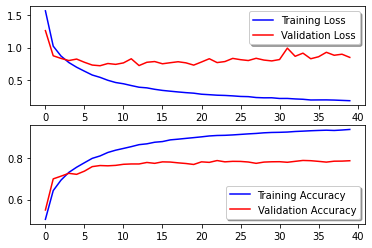

In [17]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,1)
axs[0].plot(history1.history['loss'], color = 'b', label = "Training Loss")
axs[0].plot(history1.history['val_loss'], color = 'r', label = "Validation Loss", axes = axs[0])
legend = axs[0].legend(loc='best', shadow = True)

axs[1].plot(history1.history['accuracy'], color = 'b', label = "Training Accuracy")
axs[1].plot(history1.history['val_accuracy'], color = 'r', label = "Validation Accuracy")
legend = axs[1].legend(loc='best', shadow = True)

In [18]:
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
from keras.layers.normalization import BatchNormalization
from keras.applications.vgg16 import VGG16

model_base = models.Sequential()

model_base.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model_base.add(layers.MaxPooling2D((2, 2)))
model_base.add(BatchNormalization())

model_base.add(layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
model_base.add(layers.MaxPooling2D((2, 2)))
model_base.add(BatchNormalization())

model_base.add(Dropout(0.50))
model_base.add(layers.Flatten())

model_base.add(layers.Dense(512, activation = 'relu'))
model_base.add(BatchNormalization())
model_base.add(Dropout(0.50))

model_base.add(layers.Dense(10,activation = 'softmax'))

#model1.summary()
model_base.compile(loss='categorical_crossentropy',
               optimizer= RMSprop(),
               metrics=['accuracy'])
history_base = model_base.fit(x_train, y_train,
           epochs=17,
           batch_size = 100,
           validation_data = (x_validate, y_validate),
           verbose = 1) 

Train on 40000 samples, validate on 10000 samples
Epoch 1/17
40000/40000 [==============================] - 6s 147us/step - loss: 1.5493 - accuracy: 0.5087 - val_loss: 1.3217 - val_accuracy: 0.5339
Epoch 2/17
40000/40000 [==============================] - 5s 135us/step - loss: 1.0166 - accuracy: 0.6471 - val_loss: 0.8961 - val_accuracy: 0.6905
Epoch 3/17
40000/40000 [==============================] - 5s 134us/step - loss: 0.8726 - accuracy: 0.6934 - val_loss: 0.8467 - val_accuracy: 0.7145
Epoch 4/17
40000/40000 [==============================] - 5s 131us/step - loss: 0.7703 - accuracy: 0.7314 - val_loss: 0.8370 - val_accuracy: 0.7177
Epoch 5/17
40000/40000 [==============================] - 5s 134us/step - loss: 0.6954 - accuracy: 0.7577 - val_loss: 0.7798 - val_accuracy: 0.7399
Epoch 6/17
40000/40000 [==============================] - 5s 133us/step - loss: 0.6385 - accuracy: 0.7785 - val_loss: 0.7674 - val_accuracy: 0.7461
Epoch 7/17
40000/40000 [==============================] - 5s 1

In [19]:
loss, accuracy = model_base.evaluate(x_test, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))


10000/10000 [==============================] - 1s 134us/step
Test: accuracy = 0.765900  ;  loss = 0.843699


In [0]:
model_base.save('basic-cifar.h5')

In [23]:
from keras.models import load_model
base_model = load_model('basic-cifar.h5')
loss, accuracy = base_model.evaluate(x_test, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

10000/10000 [==============================] - 1s 138us/step
Test: accuracy = 0.765900  ;  loss = 0.843699
